In [4]:

# Install necessary libraries 
# pip install pandas numpy matplotlib seaborn sqlalchemy

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set_theme(style="whitegrid")


In [7]:
# Load dataset
file_path = r'F:\Portfolio p\Insurance claims data\Insurance claims data.csv'  # Update with your dataset path
df = pd.read_csv(file_path)

# Display the first 5 rows
print(df.head())


   policy_id  subscription_length  vehicle_age  customer_age region_code  \
0  POL045360                  9.3          1.2            41          C8   
1  POL016745                  8.2          1.8            35          C2   
2  POL007194                  9.5          0.2            44          C8   
3  POL018146                  5.2          0.4            44         C10   
4  POL049011                 10.1          1.0            56         C13   

   region_density segment model fuel_type     max_torque  ... is_brake_assist  \
0            8794      C2    M4    Diesel  250Nm@2750rpm  ...             Yes   
1           27003      C1    M9    Diesel  200Nm@1750rpm  ...              No   
2            8794      C2    M4    Diesel  250Nm@2750rpm  ...             Yes   
3           73430       A    M1       CNG   60Nm@3500rpm  ...              No   
4            5410      B2    M5    Diesel  200Nm@3000rpm  ...              No   

  is_power_door_locks  is_central_locking is_power_steer

In [8]:
# Check for missing values
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 policy_id                           0
subscription_length                 0
vehicle_age                         0
customer_age                        0
region_code                         0
region_density                      0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
steering_type                       0
turning_radius                      0
length                              0
width                            

In [9]:
# Check for duplicate rows
print("Duplicate Rows:", df.duplicated().sum())

Duplicate Rows: 0


In [10]:
# Check data types and general info
print("Dataset Info:\n")
print(df.info())

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 41 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   subscription_length               58592 non-null  float64
 2   vehicle_age                       58592 non-null  float64
 3   customer_age                      58592 non-null  int64  
 4   region_code                       58592 non-null  object 
 5   region_density                    58592 non-null  int64  
 6   segment                           58592 non-null  object 
 7   model                             58592 non-null  object 
 8   fuel_type                         58592 non-null  object 
 9   max_torque                        58592 non-null  object 
 10  max_power                         58592 non-null  object 
 11  engine_type                       58592 non-null  ob

In [11]:
# Descriptive statistics
print("Descriptive Statistics:\n", df.describe())

Descriptive Statistics:
        subscription_length   vehicle_age  customer_age  region_density  \
count         58592.000000  58592.000000  58592.000000    58592.000000   
mean              6.111688      1.388473     44.823935    18826.858667   
std               4.142790      1.134413      6.935604    17660.174792   
min               0.000000      0.000000     35.000000      290.000000   
25%               2.100000      0.400000     39.000000     6112.000000   
50%               5.700000      1.200000     44.000000     8794.000000   
75%              10.400000      2.200000     49.000000    27003.000000   
max              14.000000     20.000000     75.000000    73430.000000   

            airbags  displacement      cylinder  turning_radius        length  \
count  58592.000000  58592.000000  58592.000000    58592.000000  58592.000000   
mean       3.137066   1162.355851      3.626963        4.852893   3850.476891   
std        1.832641    266.304786      0.483616        0.228061  

In [13]:
# Check unique regions or demographics (example)
print("Unique Regions:\n", df['region_code'].unique())
print("Unique Product Types:\n", df['model'].unique())


Unique Regions:
 ['C8' 'C2' 'C10' 'C13' 'C7' 'C5' 'C3' 'C19' 'C9' 'C15' 'C6' 'C11' 'C1'
 'C14' 'C17' 'C12' 'C4' 'C21' 'C16' 'C18' 'C22' 'C20']
Unique Product Types:
 ['M4' 'M9' 'M1' 'M5' 'M7' 'M6' 'M8' 'M3' 'M2' 'M10' 'M11']


In [14]:
# Drop rows with missing values
df = df.dropna()

# Confirm no missing values remain
print("Missing Values After Cleaning:\n", df.isnull().sum())


Missing Values After Cleaning:
 policy_id                           0
subscription_length                 0
vehicle_age                         0
customer_age                        0
region_code                         0
region_density                      0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
steering_type                       0
turning_radius                      0
length                              0
width             

In [15]:
# Drop duplicate rows
df = df.drop_duplicates()

# Confirm duplicates are removed
print("Duplicate Rows After Cleaning:", df.duplicated().sum())


Duplicate Rows After Cleaning: 0


In [16]:
# Check and convert column types if needed
print("Column Types Before Conversion:\n", df.dtypes)

# Example: Convert a column to datetime
# df['claim_date'] = pd.to_datetime(df['claim_date'])


Column Types Before Conversion:
 policy_id                            object
subscription_length                 float64
vehicle_age                         float64
customer_age                          int64
region_code                          object
region_density                        int64
segment                              object
model                                object
fuel_type                            object
max_torque                           object
max_power                            object
engine_type                          object
airbags                               int64
is_esc                               object
is_adjustable_steering               object
is_tpms                              object
is_parking_sensors                   object
is_parking_camera                    object
rear_brakes_type                     object
displacement                          int64
cylinder                              int64
transmission_type                    object

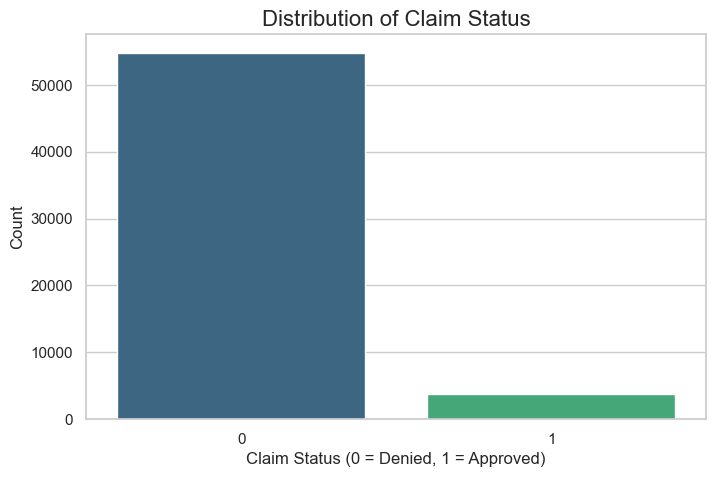

Percentage Distribution of Claim Status:
claim_status
0    93.603222
1     6.396778
Name: proportion, dtype: float64


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of claim status
plt.figure(figsize=(8, 5))
sns.countplot(x='claim_status', data=df, palette='viridis')
plt.title('Distribution of Claim Status', fontsize=16)
plt.xlabel('Claim Status (0 = Denied, 1 = Approved)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

# Percentage of claims approved vs. denied
claim_dist = df['claim_status'].value_counts(normalize=True) * 100
print("Percentage Distribution of Claim Status:")
print(claim_dist)


Top 10 Regions with Highest Claim Approval Rates:
region_code
C18    0.107438
C22    0.082126
C14    0.076776
C4     0.076692
C21    0.076517
C19    0.074580
C3     0.070972
C2     0.070825
C8     0.069870
C6     0.061798
Name: claim_status, dtype: float64


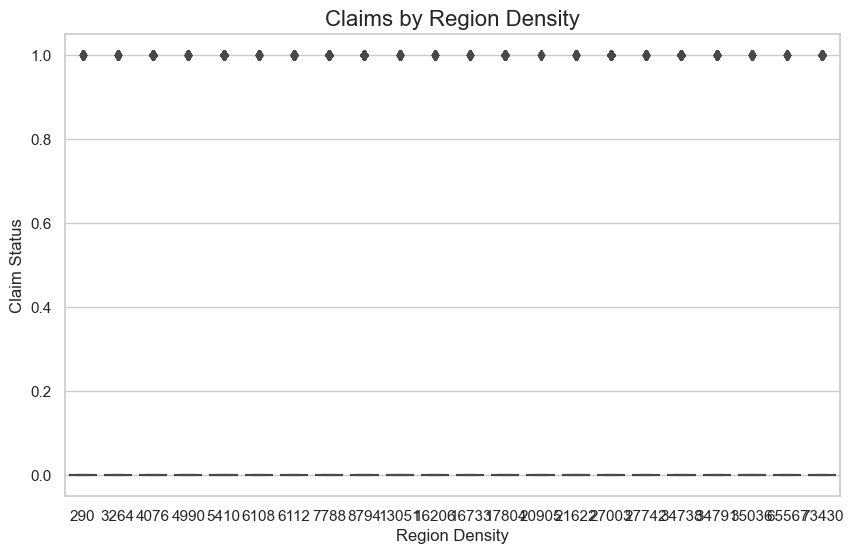

In [20]:
# Top regions with the highest claims
region_claims = df.groupby('region_code')['claim_status'].mean().sort_values(ascending=False).head(10)
print("Top 10 Regions with Highest Claim Approval Rates:")
print(region_claims)

# Claims by region density
plt.figure(figsize=(10, 6))
sns.boxplot(x='region_density', y='claim_status', data=df, palette='coolwarm')
plt.title('Claims by Region Density', fontsize=16)
plt.xlabel('Region Density', fontsize=12)
plt.ylabel('Claim Status', fontsize=12)
plt.show()


In [23]:
# Replace infinite values with NaN in the dataset
df = df.replace([float('inf'), float('-inf')], pd.NA)


C:\Users\dell\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


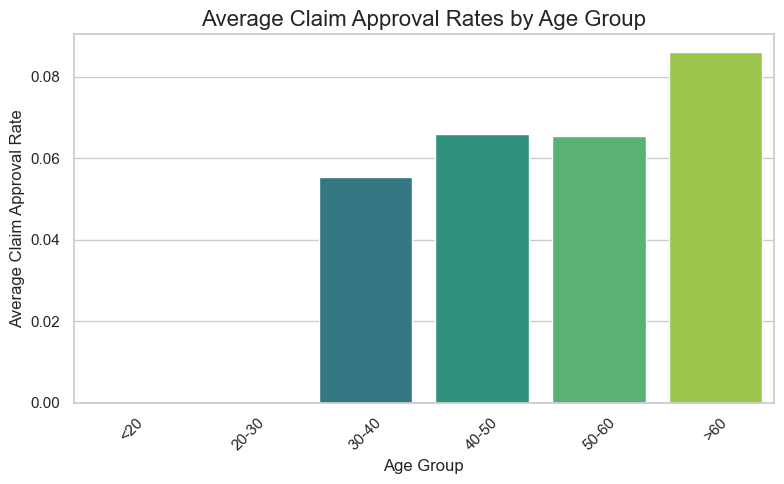

In [24]:
# Explicitly pass observed=True during groupby to avoid the warning
age_group_claims = df.groupby('age_group', observed=True)['claim_status'].mean()

# Plot the results
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.barplot(x=age_group_claims.index, y=age_group_claims.values, palette="viridis")
plt.title("Average Claim Approval Rates by Age Group", fontsize=16)
plt.xlabel("Age Group", fontsize=12)
plt.ylabel("Average Claim Approval Rate", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [25]:
# Grouping by fuel type and analyzing claims
fuel_claim_analysis = df.groupby('fuel_type').agg(
    total_claims=('claim_status', 'sum'),
    claim_frequency=('claim_status', 'count')
).reset_index()

# View the analysis
print(fuel_claim_analysis)

# Similarly, for airbags
airbags_claim_analysis = df.groupby('airbags').agg(
    total_claims=('claim_status', 'sum'),
    claim_frequency=('claim_status', 'count')
).reset_index()

# View the analysis
print(airbags_claim_analysis)


  fuel_type  total_claims  claim_frequency
0       CNG          1235            20330
1    Diesel          1150            17730
2    Petrol          1363            20532
   airbags  total_claims  claim_frequency
0        1            73             1209
1        2          2573            40425
2        6          1102            16958


In [26]:
# Count of approved vs rejected claims
claim_status_analysis = df['claim_status'].value_counts()
print(claim_status_analysis)

# Correlation of vehicle features and claim status (fraud detection)
fraud_features_analysis = df.groupby('is_esc').agg(
    fraud_rate=('claim_status', lambda x: (x == 0).mean())
).reset_index()

# View the analysis
print(fraud_features_analysis)


claim_status
0    54844
1     3748
Name: count, dtype: int64
  is_esc  fraud_rate
0     No    0.936528
1    Yes    0.934949


In [27]:
# Correlation between numerical features (excluding 'claim_status')
numerical_features = df[['subscription_length', 'vehicle_age', 'customer_age', 'region_density', 
                         'turning_radius', 'length', 'width', 'gross_weight', 'ncap_rating']]

correlation_matrix = numerical_features.corr()
print(correlation_matrix)


                     subscription_length  vehicle_age  customer_age  \
subscription_length             1.000000     0.166320      0.143350   
vehicle_age                     0.166320     1.000000     -0.035222   
customer_age                    0.143350    -0.035222      1.000000   
region_density                 -0.100316    -0.062255      0.009495   
turning_radius                  0.166472     0.332716     -0.016755   
length                          0.190925     0.383177     -0.020020   
width                           0.213284     0.414104     -0.005980   
gross_weight                    0.141088     0.302127     -0.007691   
ncap_rating                     0.173305     0.348853     -0.031399   

                     region_density  turning_radius    length     width  \
subscription_length       -0.100316        0.166472  0.190925  0.213284   
vehicle_age               -0.062255        0.332716  0.383177  0.414104   
customer_age               0.009495       -0.016755 -0.020020 -0

In [29]:
# Grouping by region to analyze claim frequency and total claim amount
region_claim_analysis = df.groupby('region_code').agg(
    total_claims=('claim_status', 'sum'), 
    claim_frequency=('claim_status', 'count')
).reset_index()

# View the analysis
print(region_claim_analysis)


   region_code  total_claims  claim_frequency
0           C1            76             1468
1          C10           148             3155
2          C11            72             1212
3          C12            87             1589
4          C13           195             3423
5          C14           281             3660
6          C15            38              771
7          C16            23              401
8          C17            19              492
9          C18            26              242
10         C19            71              952
11          C2           520             7342
12         C20             5              109
13         C21            29              379
14         C22            17              207
15          C3           433             6101
16          C4            51              665
17          C5           403             6979
18          C6            55              890
19          C7           109             2167
20          C8           954      

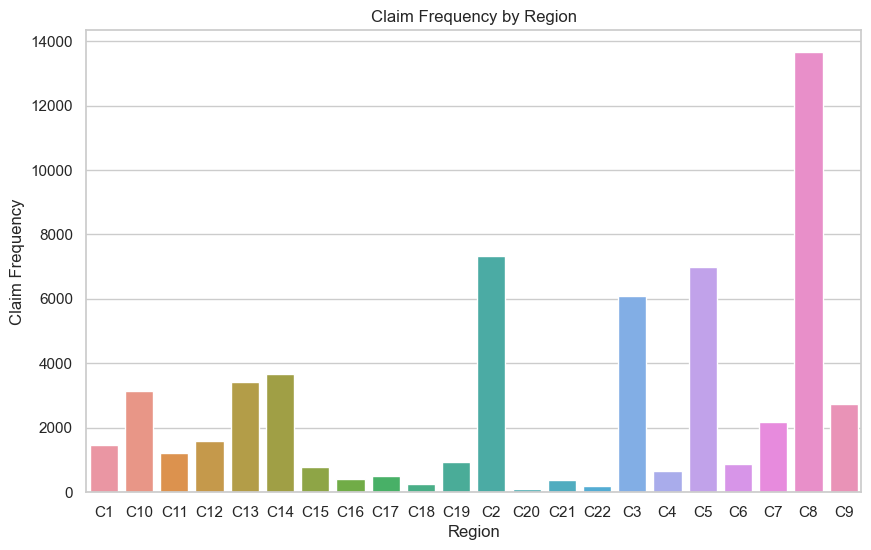

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the claim frequency by region
plt.figure(figsize=(10, 6))
sns.barplot(x='region_code', y='claim_frequency', data=region_claim_analysis)
plt.title('Claim Frequency by Region')
plt.xlabel('Region')
plt.ylabel('Claim Frequency')
plt.show()


   region_code  total_claims  claim_frequency
0           C1            76             1468
1          C10           148             3155
2          C11            72             1212
3          C12            87             1589
4          C13           195             3423
5          C14           281             3660
6          C15            38              771
7          C16            23              401
8          C17            19              492
9          C18            26              242
10         C19            71              952
11          C2           520             7342
12         C20             5              109
13         C21            29              379
14         C22            17              207
15          C3           433             6101
16          C4            51              665
17          C5           403             6979
18          C6            55              890
19          C7           109             2167
20          C8           954      

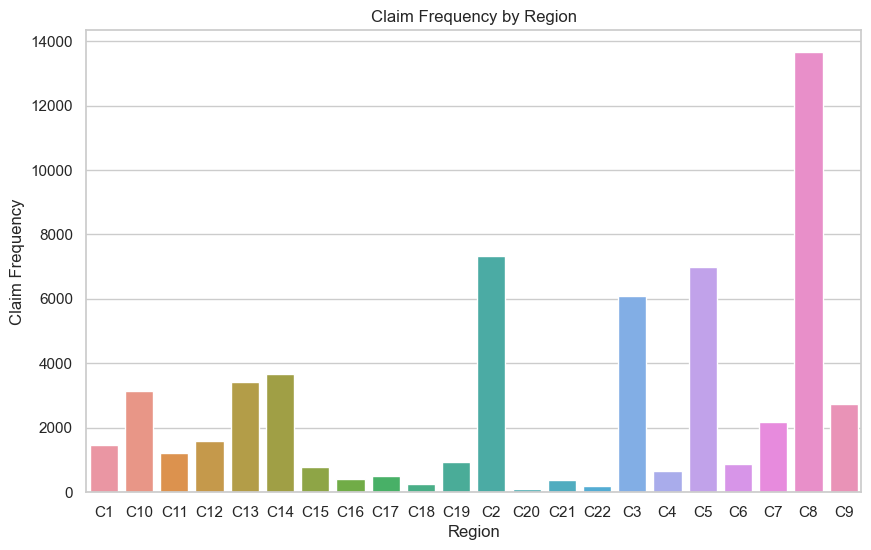

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
url = r'F:\Portfolio p\Insurance claims data\Insurance claims data.csv'  # Adjust the path if needed
df = pd.read_csv(url)

# Grouping by region to analyze claim frequency and total claim amount
region_claim_analysis = df.groupby('region_code').agg(
    total_claims=('claim_status', 'sum'), 
    claim_frequency=('claim_status', 'count')
).reset_index()

# View the analysis
print(region_claim_analysis)

# Visualize the claim frequency by region
plt.figure(figsize=(10, 6))
sns.barplot(x='region_code', y='claim_frequency', data=region_claim_analysis)
plt.title('Claim Frequency by Region')
plt.xlabel('Region')
plt.ylabel('Claim Frequency')
plt.show()


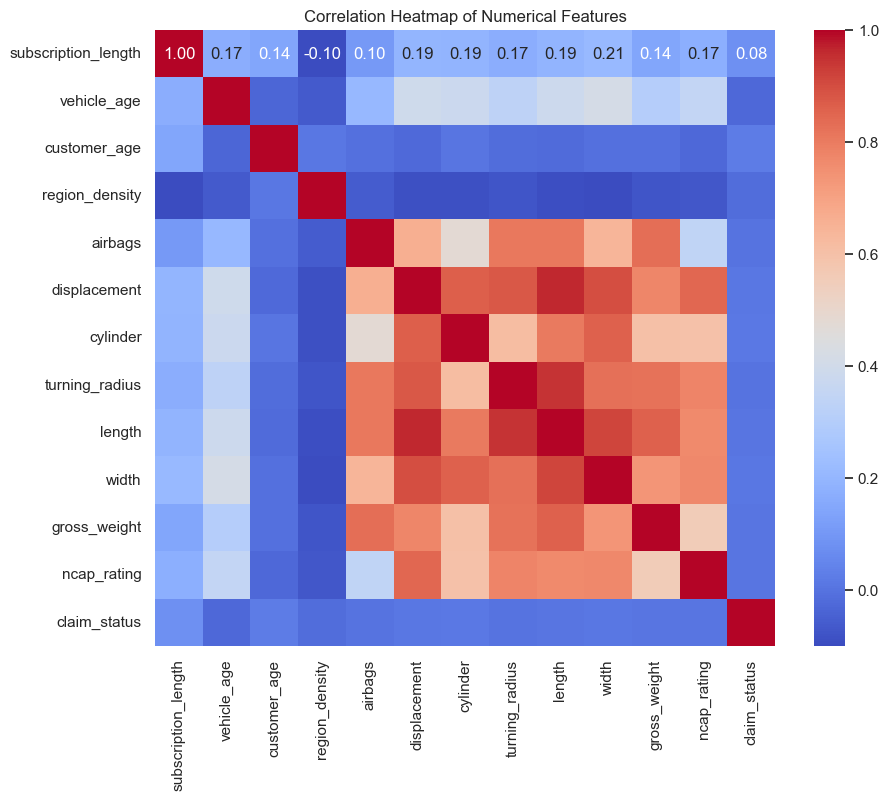

In [34]:
# Select only numeric columns for correlation analysis
numeric_df = df.select_dtypes(include=[np.number])

# Now calculate the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()
